# Quantitative analysis using pynance and TA-lib

In [1]:
#importing necessary python libraries
import pandas as pd
import talib as ta
import plotly.express as px
import matplotlib.pyplot as plt
import pynance as pn


In [8]:
# Loading the datasets into pandas dataframe
AAPL = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\AAPL_historical_data.csv'
AMZN = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\AMZN_historical_data.csv'
GOOG = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\GOOG_historical_data.csv'
META = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\META_historical_data.csv'
MSFT = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\MSFT_historical_data.csv'
NVDA = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\NVDA_historical_data.csv'
TSLA = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\TSLA_historical_data.csv'

## Exploratory Data analysis

In [66]:
goog_data= see_data.load_stock_data(GOOG)
goog_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [38]:
aapl_data= see_data.load_stock_data(AAPL)
aapl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [39]:
tsl_data= see_data.load_stock_data(TSLA)
tsl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [41]:
tsl_data= see_data.load_stock_data(TSLA)
tsl_data.shape

(3545, 9)

In [43]:
tsl_data= see_data.load_stock_data(TSLA)
tsl_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

#### Checking data before analysis like duplicates, null, missing values and outliers

In [48]:
# retrieve the number of unique values in the column 'Date'
tsl_data= see_data.load_stock_data(TSLA)
tsl_data.Date.unique()

array(['2010-06-29', '2010-06-30', '2010-07-01', ..., '2024-07-26',
       '2024-07-29', '2024-07-30'], dtype=object)

In [49]:
#keep search for duplicates and keep the last record only
tsl_data= see_data.load_stock_data(TSLA)
tsl_data.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
3540    False
3541    False
3542    False
3543    False
3544    False
Length: 3545, dtype: bool

In [51]:
#we can also drop any duplicates from the columns
tsl_data= see_data.load_stock_data(TSLA)
tsl_data.drop_duplicates(subset=['Adj Close'])


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0


In [9]:
class check_data_before_analysis:
    def __init__(self):
        pass
    def load_stock_data(self,filepath):
        self.data = pd.read_csv(filepath)
        return self.data
    def null_values_count(self,data):
        return data.isnull().sum()
    

In [21]:
see_data = check_data_before_analysis()
data = see_data.load_stock_data(AAPL)
data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


#### get index of all the detected duplications in the TSLA datset

In [52]:
tsl_data= see_data.load_stock_data(TSLA)
tsl_data[tsl_data.duplicated(keep=False)].index

Index([], dtype='int64')

In [57]:
nan_rows = data[data.isna().any(axis=1)]
nan_rows

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits


In [58]:
data_amzn = see_data.load_stock_data(AMZN)
data_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [59]:
#we can return 'True' or 'False' for missing values
nan_rows = data_amzn.isna()
nan_rows

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6841,False,False,False,False,False,False,False,False,False
6842,False,False,False,False,False,False,False,False,False
6843,False,False,False,False,False,False,False,False,False
6844,False,False,False,False,False,False,False,False,False


In [60]:
nan_counts = data_amzn.isna().sum()
print(nan_counts)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [61]:
goog_data= see_data.load_stock_data(GOOG)
goog_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [67]:
meat_data =see_data.load_stock_data(meta)
meat_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [68]:
see_data.null_values_count(meat_data)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [69]:
see_data.load_stock_data(MSFT)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0


In [70]:
see_data.load_stock_data(nvda)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0


In [71]:
see_data.load_stock_data(tsla)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0


In [73]:
class FinancialAnalyzer:
    def __init__(self):
        pass

    def load_data(self, filepath):
        """Load stock data from a CSV file into a pandas DataFrame."""
        data = pd.read_csv(filepath, index_col='Date', parse_dates=True)
        return data
#create methods used to calculate the technical indicators
    def calculate_moving_average(self, data, window_size=20):
        """Calculate Simple Moving Average (SMA) using TA-Lib."""
        data['SMA'] = ta.SMA(data['Close'], timeperiod=window_size)
        return data

    def calculate_rsi(self, data, time_period=14):
        """Calculate Relative Strength Index (RSI) using TA-Lib."""
        data['RSI'] = ta.RSI(data['Close'], timeperiod=time_period)
        return data

    def calculate_ema(self, data, window_size=20):
        """Calculate Exponential Moving Average (EMA) using TA-Lib."""
        data['EMA'] = ta.EMA(data['Close'], timeperiod=window_size)
        return data

    def calculate_macd(self, data):
        """Calculate Moving Average Convergence Divergence (MACD) using TA-Lib."""
        data['MACD'], data['MACD_Signal'], _ = ta.MACD(data['Close'])
        return data

    def plot_data(self, *args):
        # """Create a plot using Plotly."""
        plt.style.use('fivethirtyeight')
        args[0][[args[1],args[2]]].plot(figsize=(8,8),title=args[3])
        plt.show
    def plot_rsi(self,data,title):
        data['RSI'].plot(figsize=(8,8),marker='o',title=title)
        data.tail(10)
    def plot_sma_and_ema(self,*args):
        plt.style.use('fivethirtyeight')
        args[0][[args[1],args[2],args[3]]].plot(figsize=(8,8),title=args[4])
        plt.show

    def analyze_stock(self, filename):
        """Perform the entire analysis on a single stock."""
        data = self.load_data(filename)
        
        # Calculate technical indicators
        data = self.calculate_moving_average(data)
        data = self.calculate_rsi(data)
        data = self.calculate_ema(data)
        data = self.calculate_macd(data)
        
        # Plot the results
        self.plot_data(data, 'Close', 'SMA', 'Stock Price with Simple Moving Average (SMA)')
        self.plot_data(data, 'Close', 'EMA', 'Stock Price with Exponential Moving Average (EMA)')
        self.plot_sma_and_ema(data, 'Close','SMA' ,'EMA', 'Stock Price with Exponential Moving Average (EMA) and  Simple Moving Average (SMA)')
        self.plot_rsi(data,  'Relative Strength Index (RSI)')
        self.plot_data(data, 'MACD', 'MACD_Signal', 'Moving Average Convergence Divergence (MACD)')

In [75]:
#analyse the 'AAPL' datset so as to start calculating the technical indicators
aapl_analysis = FinancialAnalyzer()
aapl_data =  aapl_analysis.load_data(AAPL)
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [86]:
#calculating the 'moving average' for the 'AAPL' dataset
moving_average_for_aapl = aapl_analysis.calculate_moving_average(aapl_data)
moving_average_for_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA
Date,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001


In [87]:
# return 'SMA' of the 'AAPL' dtaset
column_data = moving_average_for_appl['SMA']
# Display the entire column
print(column_data)  

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2024-07-24    224.228500
2024-07-25    224.440500
2024-07-26    224.633500
2024-07-29    225.014500
2024-07-30    225.117001
Name: SMA, Length: 10998, dtype: float64


In [84]:
 # For numerical columns
print(column_data.describe()) 

count    10979.000000
mean        22.157875
std         45.662784
min          0.055999
25%          0.300642
50%          0.530273
75%         20.059625
max        225.117001
Name: SMA, dtype: float64


In [88]:
#calculate the 'Relative Strength Index' for 'AAPL' dataset
aapl_rsi = aapl_analysis.calculate_rsi(moving_average_for_aapl)
aapl_rsi.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI
Date,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001,49.359115


In [89]:
# Rreturn 'RSI' values of the 'AAPL' dtaset
column_data = moving_average_for_appl['RSI']
# Display the entire columns detail
print(column_data.describe())  

count    10984.000000
mean        53.119636
std         13.040051
min         15.346105
25%         43.465694
50%         52.980476
75%         62.755369
max         91.502574
Name: RSI, dtype: float64


In [90]:
#calculate 'Exponential Moving Average (EMA)' for 'AAPL' dataset
aapl_ema = aapl_analysis.calculate_ema(aapl_rsi)
aapl_ema.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA
Date,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,222.376929
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,221.911508
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,221.535174
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184,221.221349
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001,49.359115,220.990744


In [91]:
# Rreturn 'EMA' values of the 'AAPL' dtaset
column_data = moving_average_for_appl['EMA']
# Display the entire columns detail
print(column_data.describe())  

count    10979.000000
mean        22.160028
std         45.657255
min          0.055609
25%          0.302342
50%          0.530205
75%         20.245397
max        222.780817
Name: EMA, dtype: float64


In [92]:
# calculate the 'Moving Average Convergence Divergence (MACD)' of the 'AAPL' dataset
aapl_macd  = aapl_analysis.calculate_macd(aapl_ema)
aapl_macd.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,222.376929,4.662717,6.678882
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,221.911508,3.748082,6.092722
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,221.535174,3.026267,5.479431
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184,221.221349,2.448591,4.873263
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001,49.359115,220.990744,2.012764,4.301163


In [93]:
# Rreturn 'RSI' values of the 'AAPL' dtaset
column_data = moving_average_for_appl['MACD']
# Display the entire columns detail
print(column_data.describe())  

count    10965.000000
mean         0.139020
std          1.013181
min         -6.673117
25%         -0.007107
50%          0.003685
75%          0.065976
max          8.948060
Name: MACD, dtype: float64


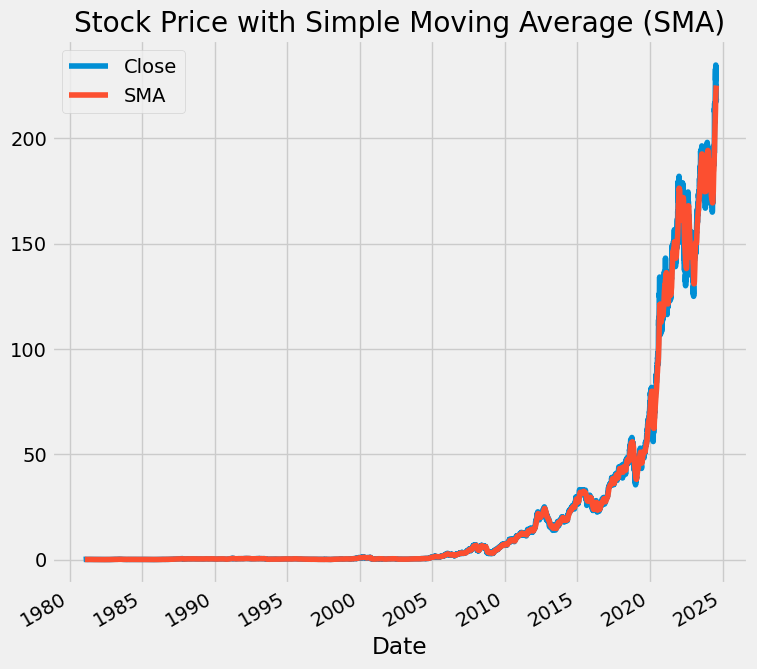

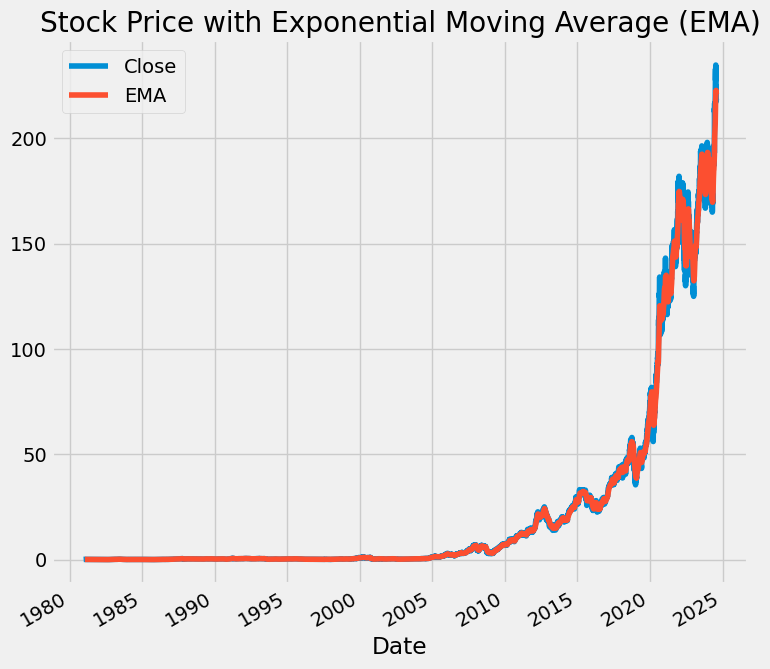

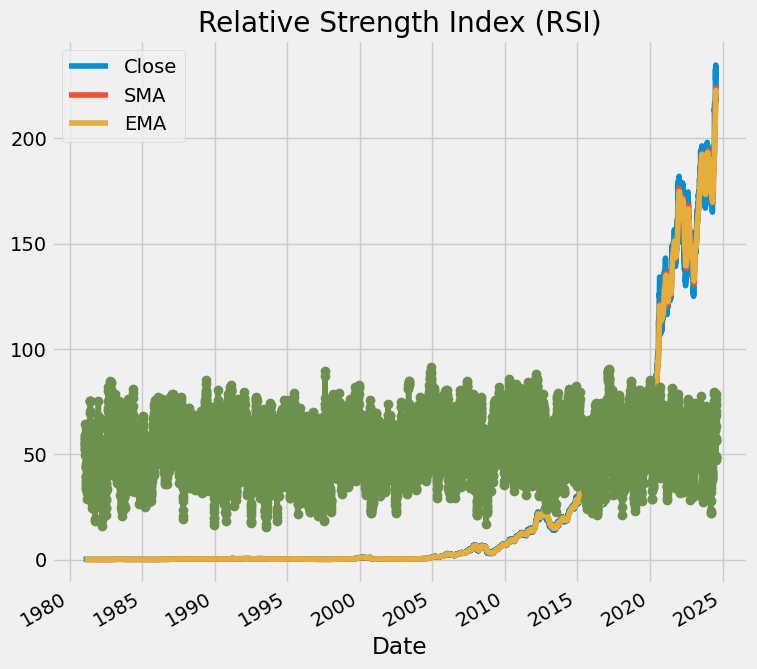

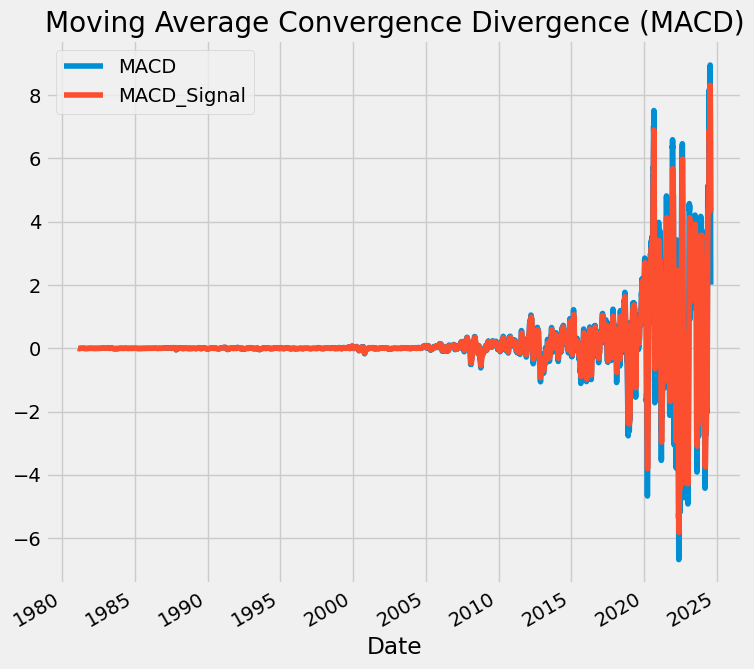

In [95]:
#Analyse the 'AAPL' stock price with respect to the date in technical indicators
aapl_analysis.analyze_stock(AAPL)

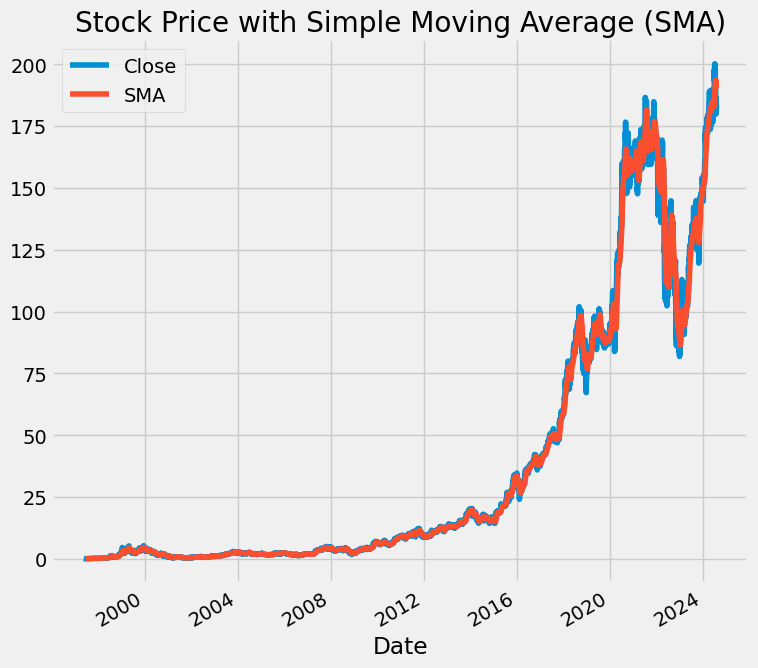

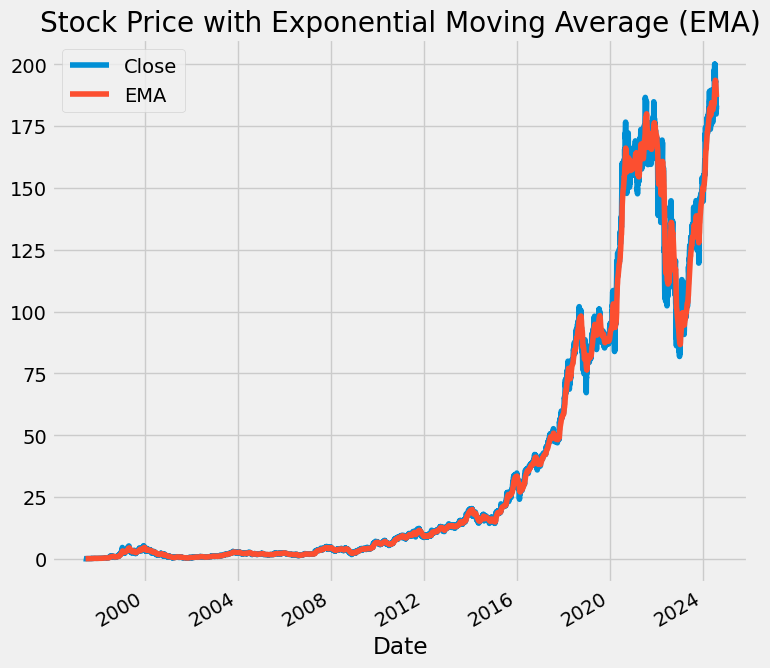

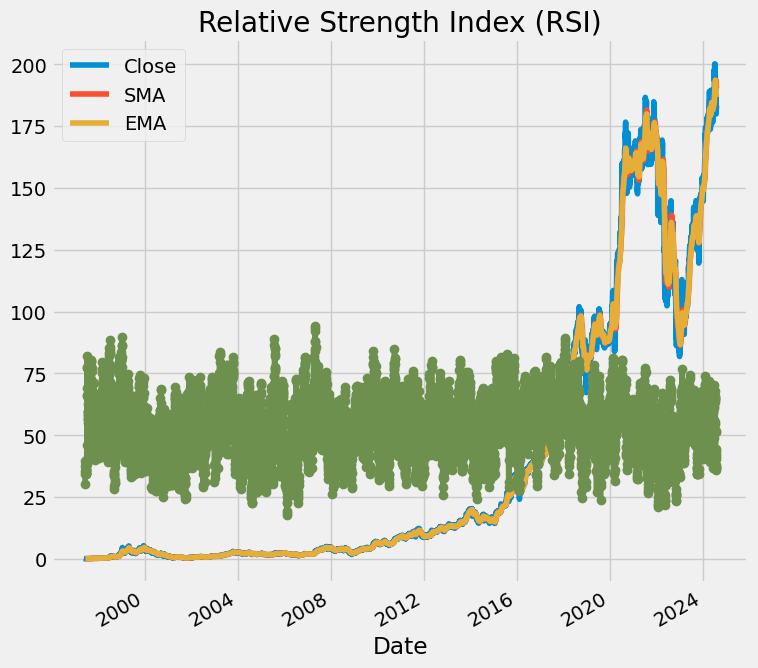

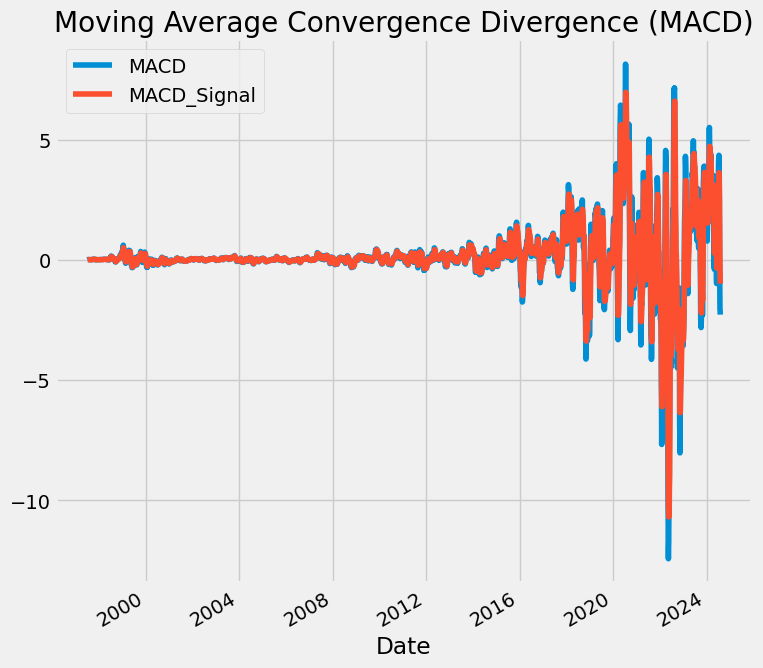

In [26]:
amazon_analysis = FinancialAnalyzer()
amazon_analysis.load_data(amazon)
amazon_analysis.analyze_stock(amazon)

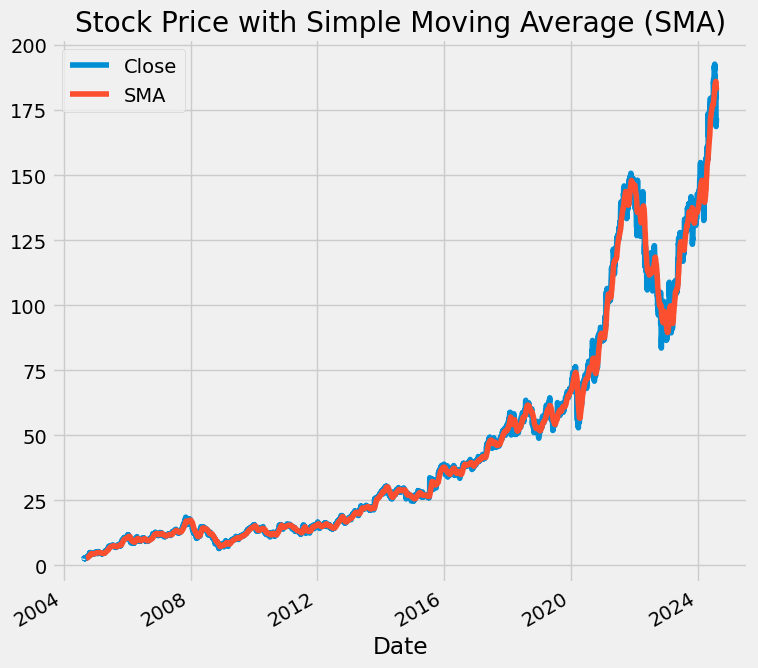

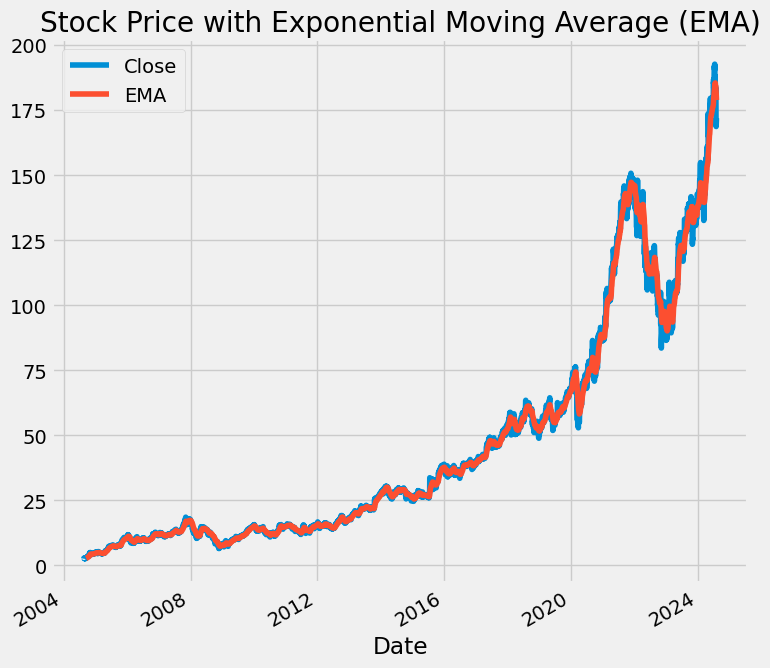

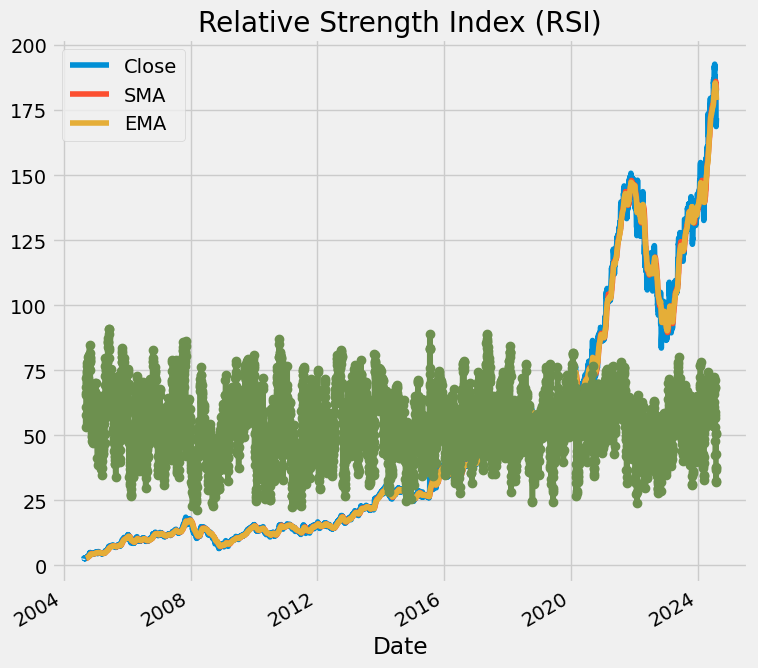

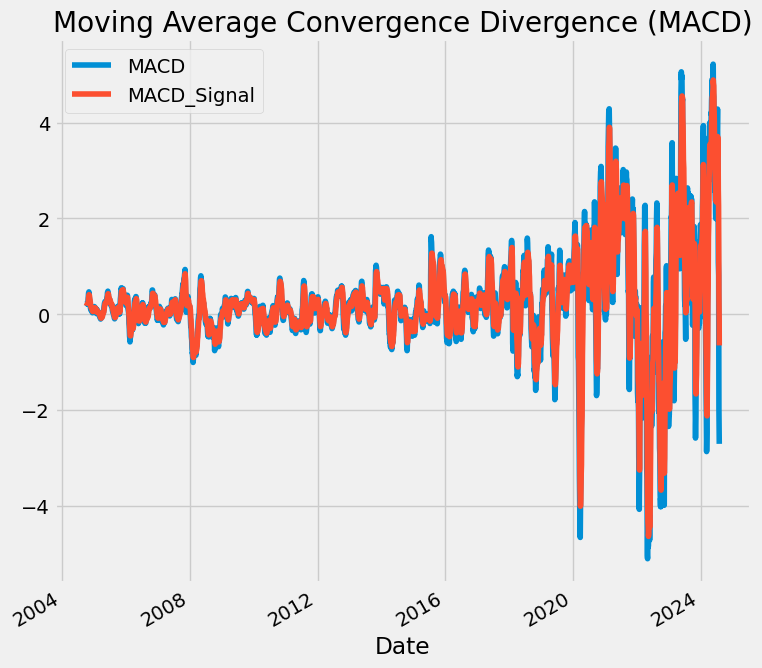

In [96]:
goog_analysis = FinancialAnalyzer()
goog_analysis.load_data(GOOG)
goog_analysis.analyze_stock(GOOG)

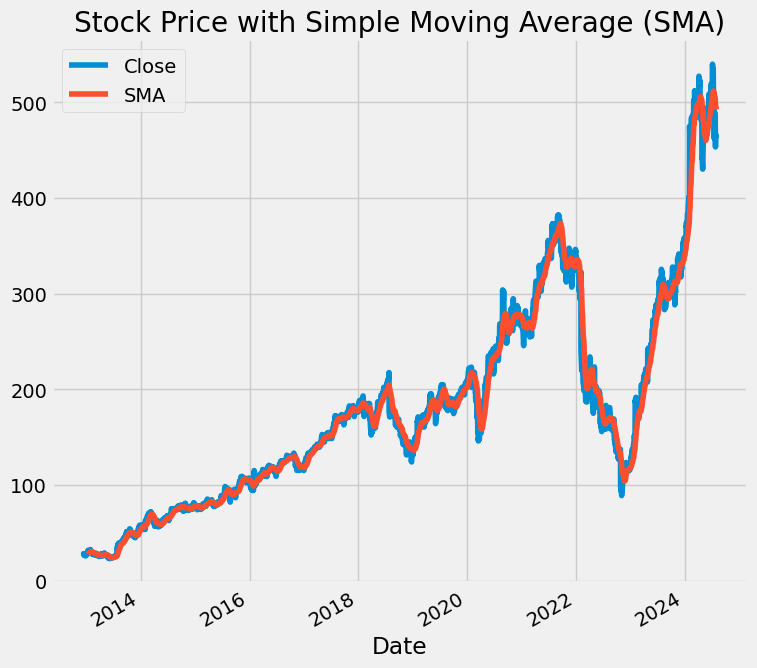

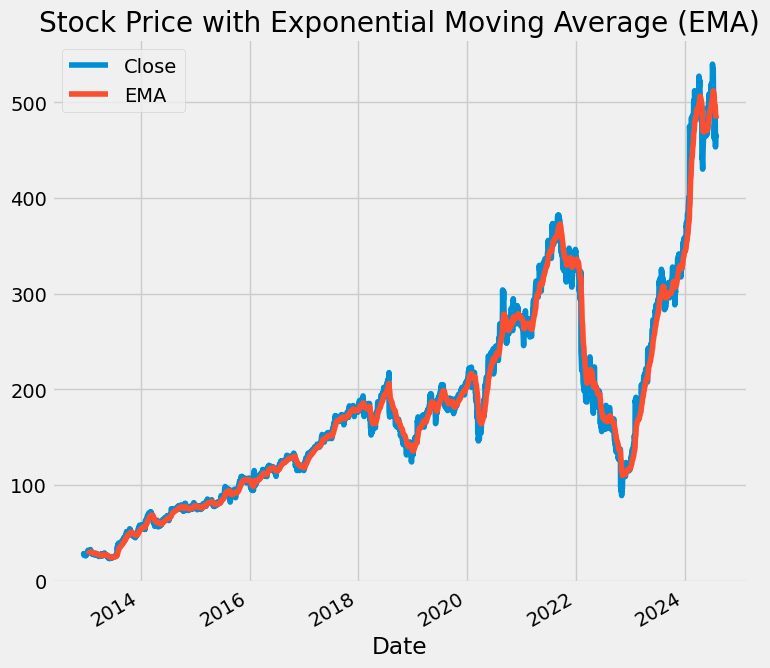

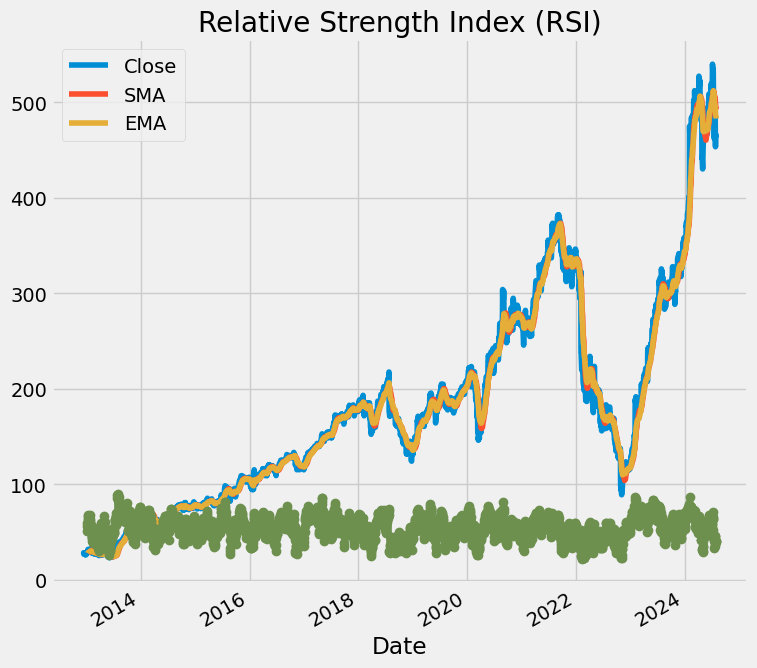

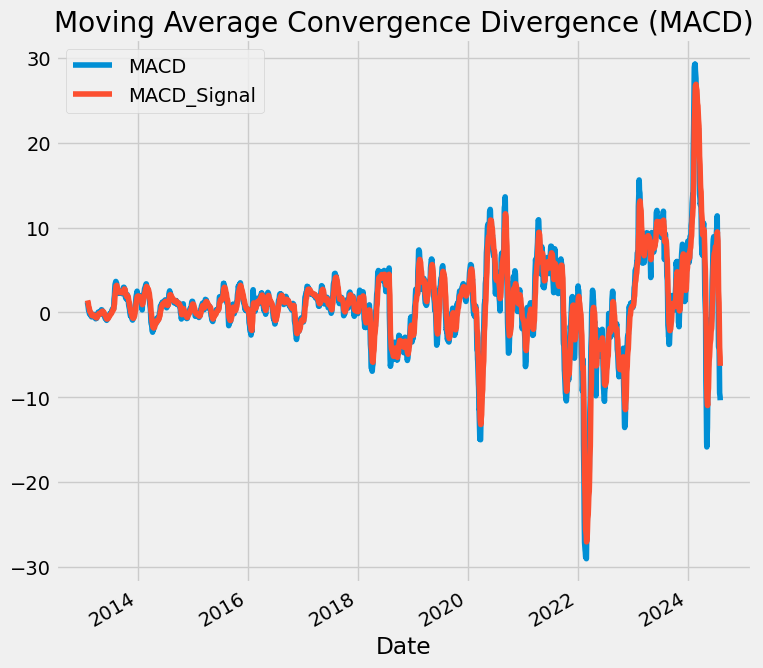

In [97]:
meta_analysis = FinancialAnalyzer()
meta_analysis.load_data(meta)
meta_analysis.analyze_stock(meta)

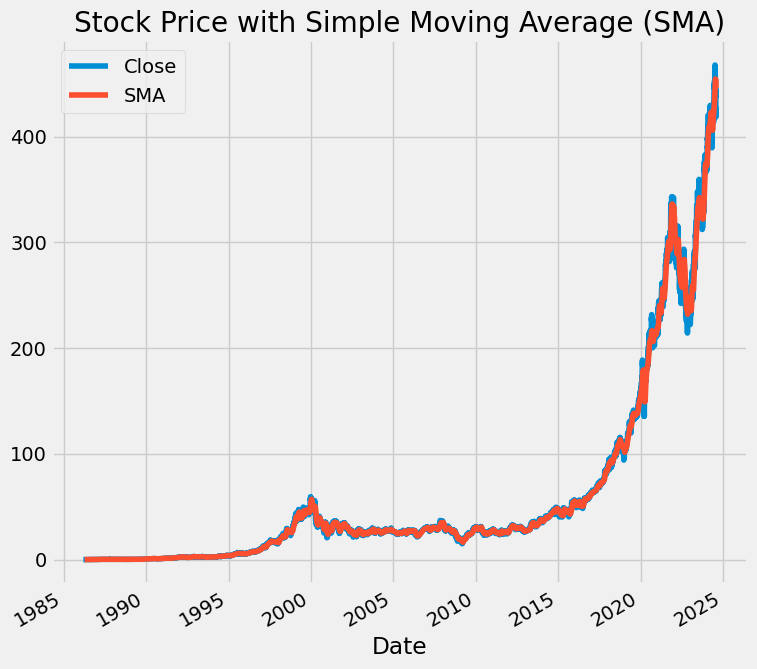

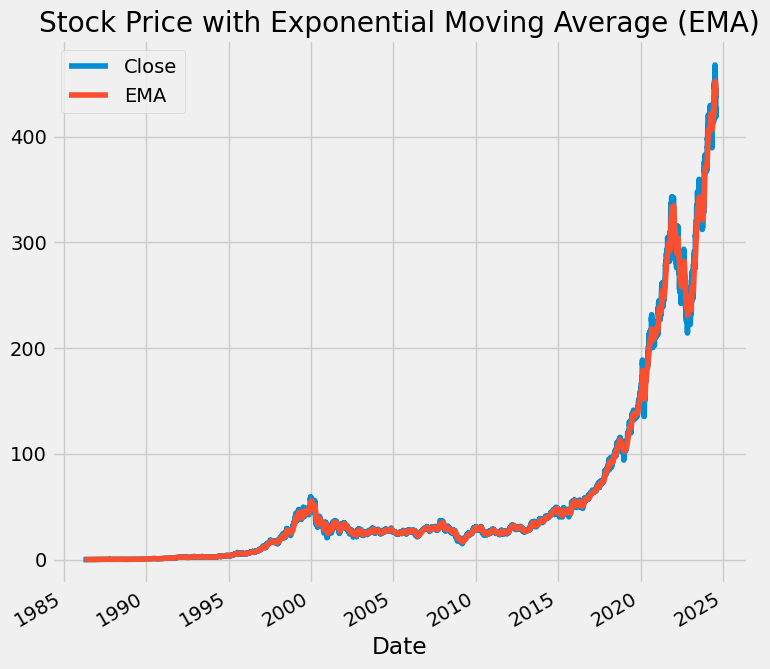

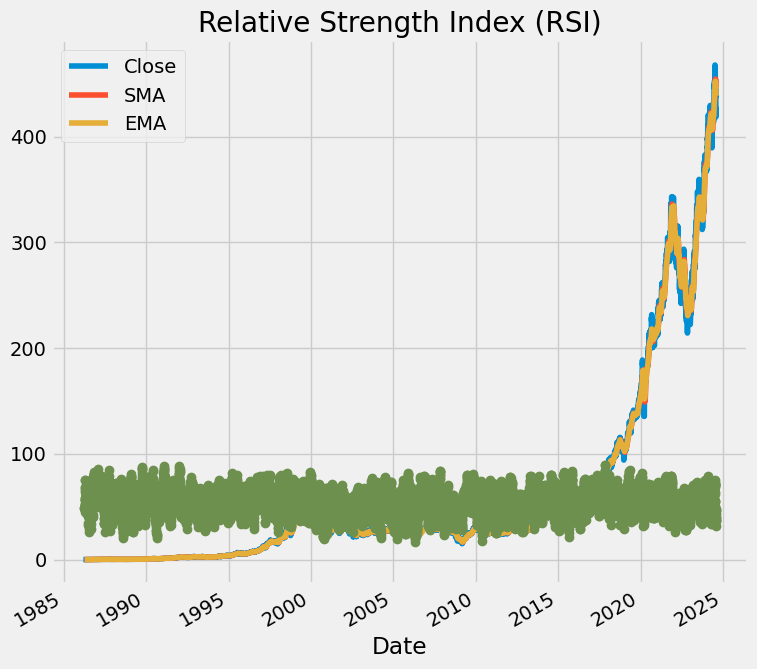

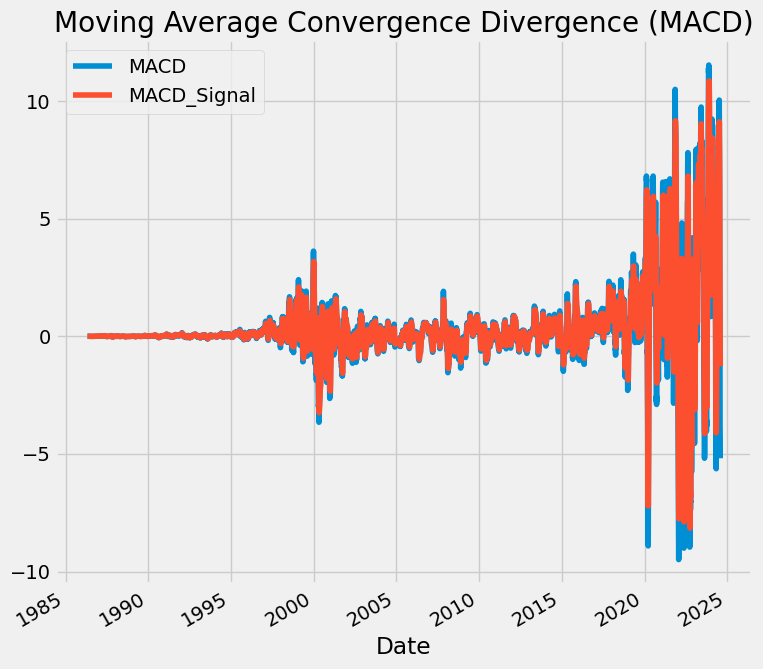

In [29]:
microsoft_analysis = FinancialAnalyzer()
microsoft_analysis.load_data(microsoft)
microsoft_analysis.analyze_stock(microsoft)

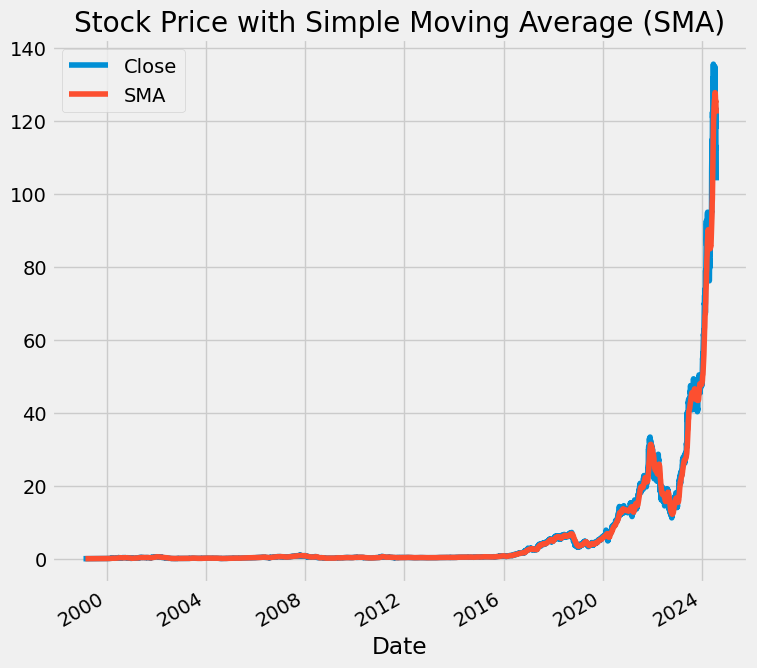

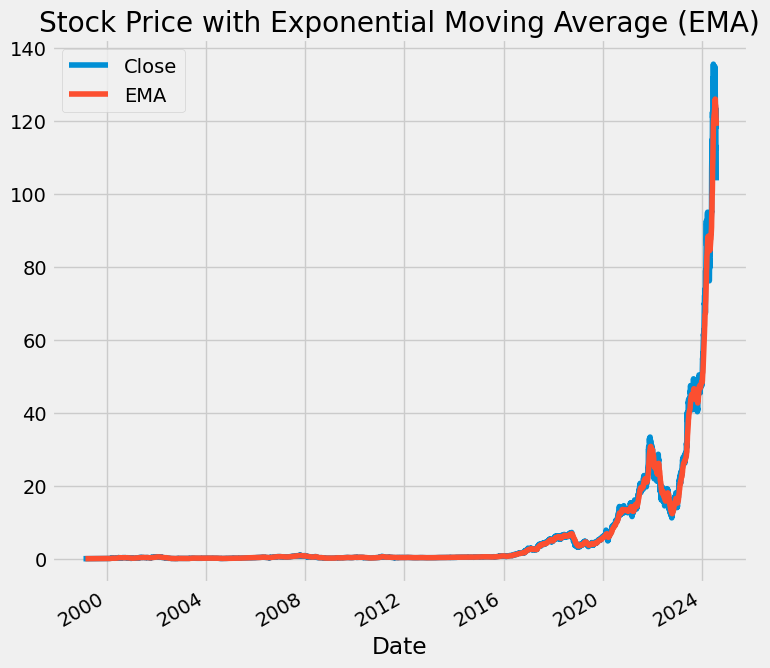

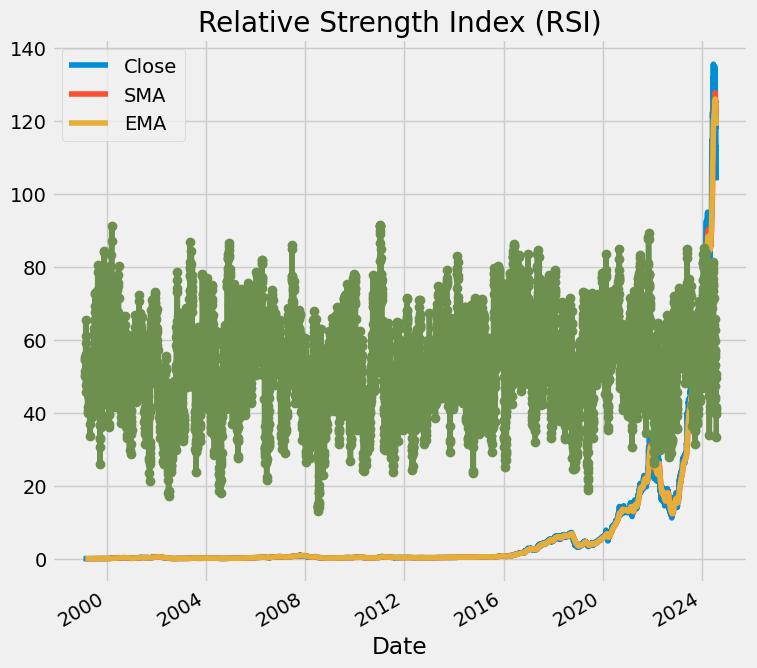

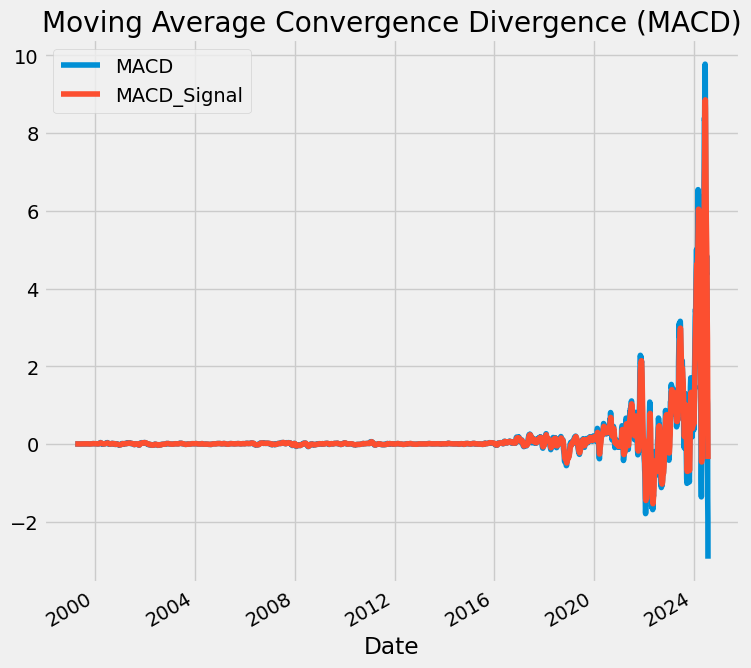

In [100]:
nvda_analysis = FinancialAnalyzer()
nvda_analysis.load_data(NVDA)
nvda_analysis.analyze_stock(NVDA)

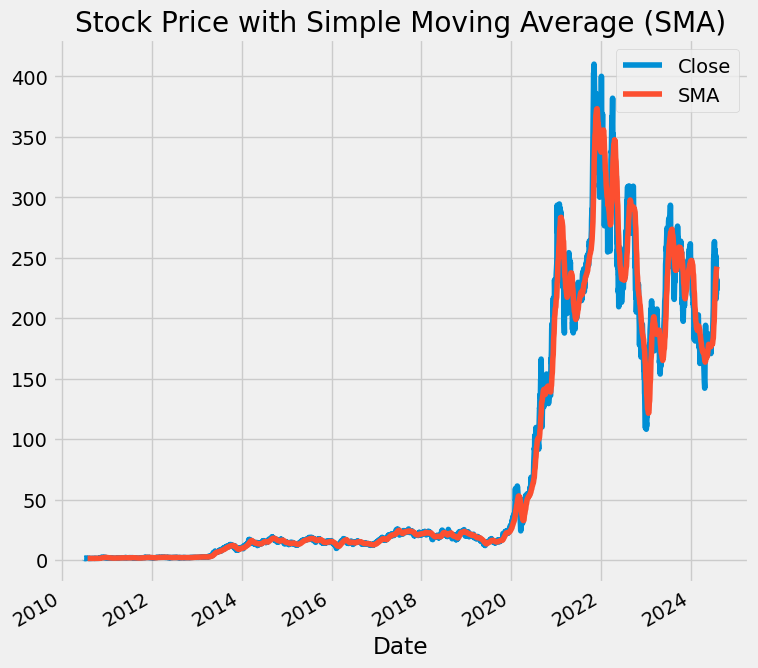

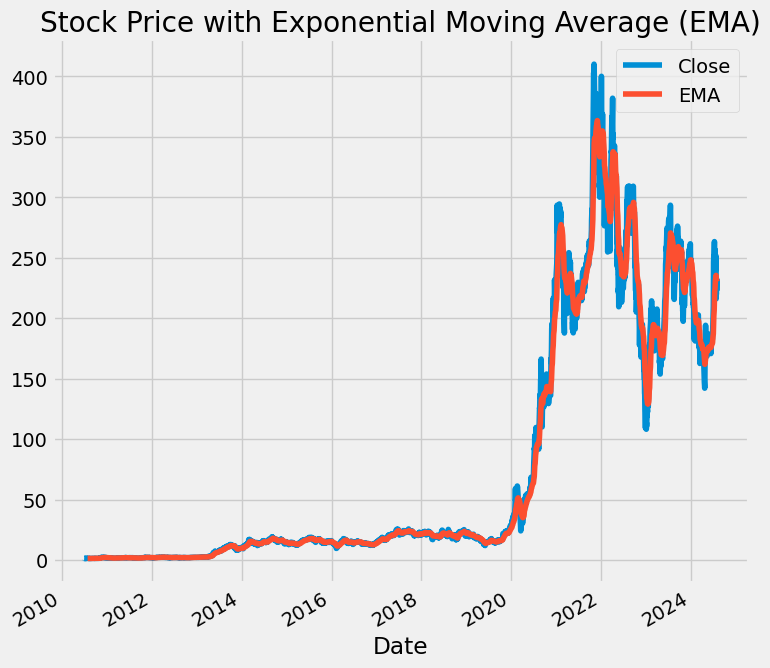

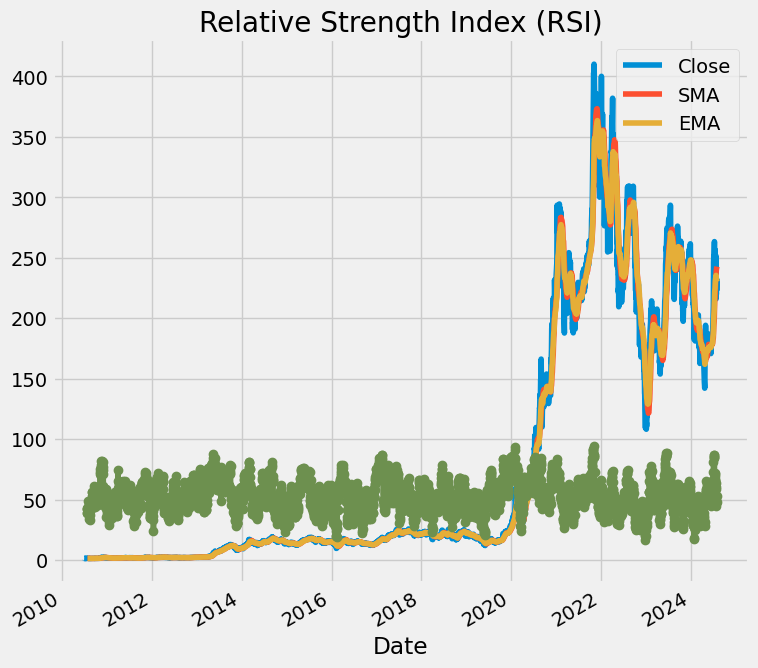

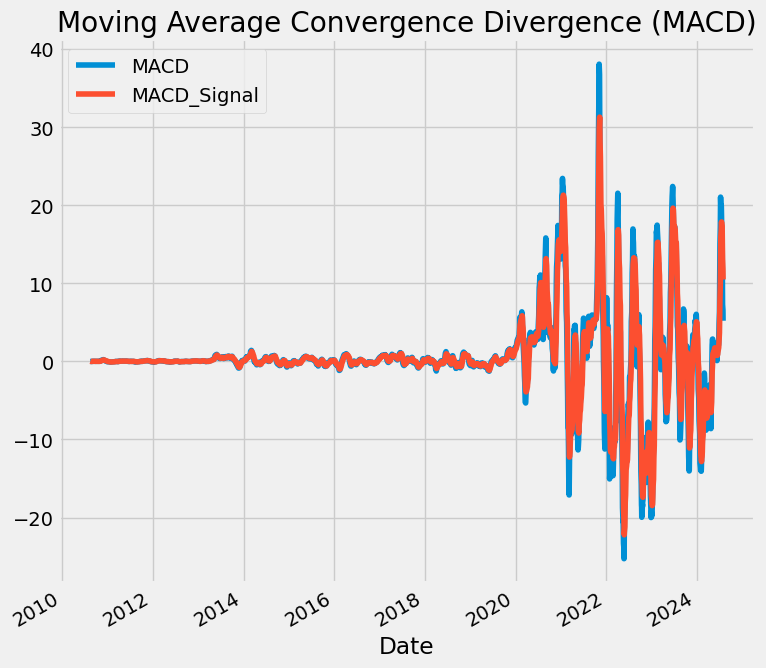

In [31]:
tsla_analysis = FinancialAnalyzer()
tsla_analysis.load_data(tsla)
tsla_analysis.analyze_stock(tsla)

In [ ]:
# create visualizations to understand the impact of different indicators on the stock price

In [103]:
# importing necessary libraries and packages
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import seaborn as sns


class Analyze_portfolio:
    def geting_the_combine_data(self,tickers,file_path):
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)
        return data
    def calculate_portfolio_weights(self, tickers,file_path): #This output suggests that, for the best risk-adjusted returns, 
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)

        print(data.head())  # View the resulting DataFrame
        print(data.tail())
        mu = expected_returns.mean_historical_return(data)
        print(f'expected return {mu}')
        cov = risk_models.sample_cov(data)
        ef = EfficientFrontier(mu, cov)
        weights = ef.max_sharpe()
        weights = dict(zip(tickers, weights.values()))
        return weights

    def calculate_portfolio_performance(self, tickers,file_path): 
        ''' 
        Portfolio Return: Your portfolio might give you a percent return over the next year.
        Portfolio Volatility: There's an perccent risk (standard deviation) associated with these returns.
        Sharpe Ratio: The returns are number times the risk, which is generally considered a good risk-return trade-off.
        '''
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)
        mu = expected_returns.mean_historical_return(data)
        cov = risk_models.sample_cov(data)
        ef = EfficientFrontier(mu, cov)
        weights = ef.max_sharpe()
        portfolio_return, portfolio_volatility, sharpe_ratio = ef.portfolio_performance()
        return portfolio_return, portfolio_volatility, sharpe_ratio
    def plot_portfolio_weights(self, weights):
        # Convert the dictionary of weights to lists
        tickers = list(weights.keys())
        allocations = list(weights.values())

        # Plotting the weights as a bar chart
        plt.figure(figsize=(10, 6))
        sns.barplot(x=tickers, y=allocations, palette='viridis')

        # Adding titles and labels
        plt.title('Portfolio Weights')
        plt.xlabel('Tickers')
        plt.ylabel('Allocation (%)')

        # Display the plot
        plt.show()
        
    def plot_portfolio_performance(self , tickers,csv_paths):
        # Portfolio performance data
        portfolio_return, portfolio_volatility, sharpe_ratio = self.calculate_portfolio_performance(tickers, csv_paths)
    
        # Prepare the data for plotting
        metrics = {
            'Expected Return': portfolio_return,
            'Volatility': portfolio_volatility,
            'Sharpe Ratio': sharpe_ratio
        }

        # Plotting the performance metrics
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues_d')

        # Adding titles and labels
        plt.title('Portfolio Performance Metrics')
        plt.ylabel('Values')
        plt.ylim(0, 1.2)  # Adjust the y-axis limit for better visualization

        # Display the plot
        plt.show()

In [106]:
#analyze the portfolio weights of the seven datasets
analyze_portfolio = Analyze_portfolio()
tickers = ['AAPL', 'AMZN', 'GOOGL','META','MSFT','NVDA','TSLA']
csv_paths =[AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA]
analyze_portfolio.calculate_portfolio_weights(tickers,csv_paths)

                 AAPL     AMZN      GOOGL       META       MSFT     NVDA  \
Date                                                                       
2012-12-12  19.250000  12.5880  17.373878  27.580000  27.240000  0.31300   
2012-12-13  18.917500  12.5625  17.501900  28.240000  27.110001  0.31325   
2012-12-14  18.206785  12.4595  17.483467  26.809999  26.809999  0.31475   
2012-12-17  18.529642  12.6930  17.952211  26.750000  27.100000  0.31350   
2012-12-18  19.067858  13.0200  17.959435  27.709999  27.559999  0.31400   

                TSLA  
Date                  
2012-12-12  2.350667  
2012-12-13  2.240667  
2012-12-14  2.254000  
2012-12-17  2.293333  
2012-12-18  2.306000  
                  AAPL        AMZN       GOOGL        META        MSFT  \
Date                                                                     
2024-07-24  218.539993  180.830002  174.369995  461.269989  428.899994   
2024-07-25  217.490005  179.850006  169.160004  453.410004  418.399994   
2024-07-26

{'AAPL': 0.0,
 'AMZN': 0.0,
 'GOOGL': 0.0,
 'META': 0.0,
 'MSFT': 0.1156902166947645,
 'NVDA': 0.7321878809499264,
 'TSLA': 0.1521219023553091}

In [107]:
#return the combined dataset
the_whole_data=analyze_portfolio.geting_the_combine_data(tickers,csv_paths)
the_whole_data.head()

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-12-12,19.250000,12.5880,17.373878,27.580000,27.240000,0.31300,2.350667
2012-12-13,18.917500,12.5625,17.501900,28.240000,27.110001,0.31325,2.240667
2012-12-14,18.206785,12.4595,17.483467,26.809999,26.809999,0.31475,2.254000
2012-12-17,18.529642,12.6930,17.952211,26.750000,27.100000,0.31350,2.293333
2012-12-18,19.067858,13.0200,17.959435,27.709999,27.559999,0.31400,2.306000


In [108]:
#write the combined dataset to the working directory
the_whole_data.to_csv('E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance/closing_for_the_seven_data_together.csv')

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\you\AppData\Local\Temp\ipykernel_2396\3570592399.py:1: SyntaxWarning: invalid escape sequence '\K'
  the_whole_data.to_csv('E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance/closing_for_the_seven_data_together.csv')


In [109]:
def calculate_portfolio_performance_after_taking_the_common_time(self, tickers,file_path): 
        ''' 
        Portfolio Return: Your portfolio might give you a percent return over the next year.
        Portfolio Volatility: There's an perccent risk (standard deviation) associated with these returns.
        Sharpe Ratio: The returns are number times the risk, which is generally considered a good risk-return trade-off.
        '''
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)
        mu = expected_returns.mean_historical_return(data)
        cov = risk_models.sample_cov(data)
        ef = EfficientFrontier(mu, cov)
        weights = ef.max_sharpe()
        portfolio_return, portfolio_volatility, sharpe_ratio = ef.portfolio_performance()
        return portfolio_return, portfolio_volatility, sharpe_ratio

### This output suggests that, for the best risk-adjusted returns, 
- **AAPL: 0.0** - You should not allocate any of your investment into Apple (AAPL).
- **AMZN: 0.00** - Allocate approximately 8.44% of your total investment into Amazon (AMZN).
- **GOOGL: 0.00** - Allocate about 25.92% of your total investment into Alphabet (GOOGL).
- **META: 0.00** - Allocate approximately 15.52% of your total investment into Meta (META).
- **MSFT: 0.1156902166947648** - Allocate about 20.51% of your total investment into Microsoft (MSFT).
- **NVDA: 0.7321878809499263** - Allocate approximately 6.84% of your total investment into Nvidia (NVDA).
- **TSLA: 0.1521219023553091** - Allocate about 22.77% of your total investment into Tesla (TSLA).


In [110]:
analyze_portfolio.calculate_portfolio_performance(tickers,csv_paths)

(0.5788203573268834, 0.3902690460350426, 1.4318849086399397)

- **Portfolio Return: 0.3015** - This suggests that the portfolio is expected to return approximately 30.15% over the period analyzed.
- **Portfolio Volatility: 0.2897** - This indicates that the portfolio has a volatility (risk) of about 28.97%, which measures the degree of variation in the portfolio's returns.
- **Sharpe Ratio: 0.9716** - This Sharpe Ratio implies that the portfolio has a risk-adjusted return of approximately 0.97. A higher Sharpe Ratio is generally better, as it indicates a more favorable risk-return tradeoff.


C:\Users\you\AppData\Local\Temp\ipykernel_2396\1801540863.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tickers, y=allocations, palette='viridis')


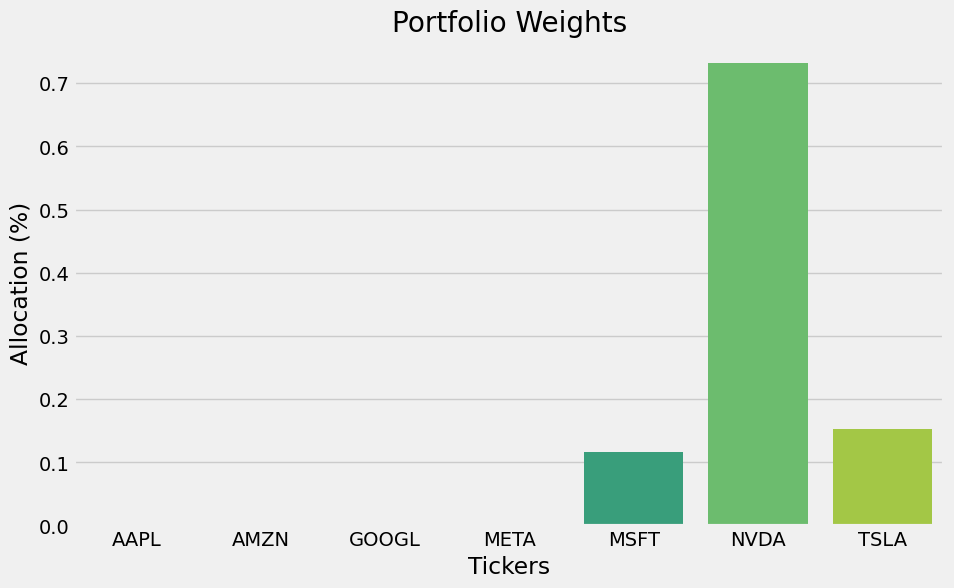

In [111]:
weights = {'AAPL': 0.0,
 'AMZN': 0.0,
 'GOOGL': 0.0,
 'META': 0.0,
 'MSFT': 0.1156902166947648,
 'NVDA': 0.7321878809499263,
 'TSLA': 0.1521219023553091
 }
analyze_portfolio.plot_portfolio_weights(weights)

C:\Users\you\AppData\Local\Temp\ipykernel_2396\1801540863.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues_d')


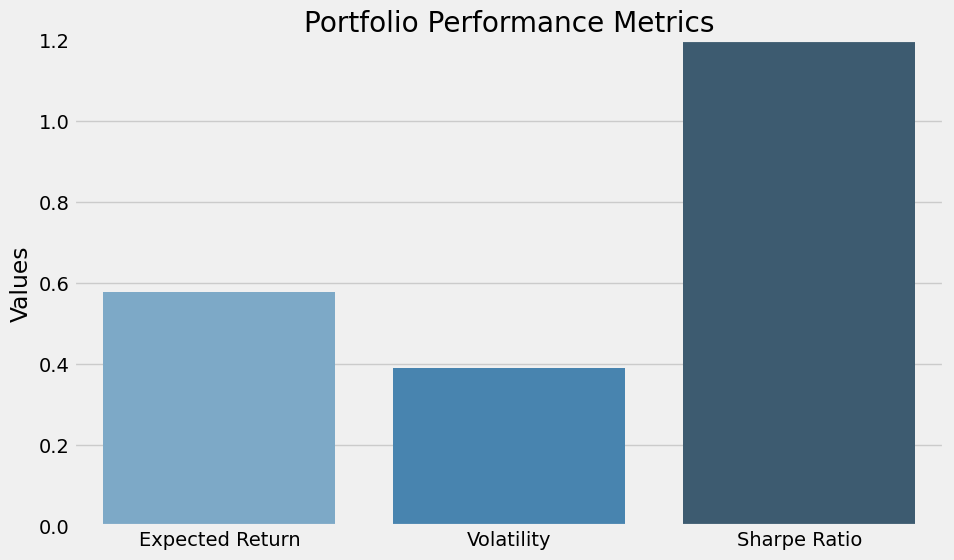

In [112]:
analyze_portfolio.plot_portfolio_performance(tickers,csv_paths)